### Load the WAF model

In [1]:
import pickle

class_names = ['Good query','Bad query']
lgs = pickle.load(open('./waf_model/pickled_lgs', 'rb'))
vectorizer = pickle.load(open('./waf_model/pickled_vectorizer','rb'))



### Load LimeTextExplainer

In [2]:

# Explaining predictions using lime
# Lime explainers assume that classifiers act on raw text, but sklearn classifiers act on vectorized representation of texts. 
# For this purpose, we use sklearn's pipeline, and implements predict_proba on raw_text lists.
from lime import lime_text
from sklearn.pipeline import make_pipeline
prediction_pipeline = make_pipeline(vectorizer, lgs)



# Now we create an explainer object. We pass the class_names as an argument for prettier display.
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)


### Generate Explanation for selected query

Probability = 0.9999999999749516
script: 0.0000
1: 0.0000
alert: 0.0000

LIME explanation saved as HTML file at: ./explanation/waf_explanation.html


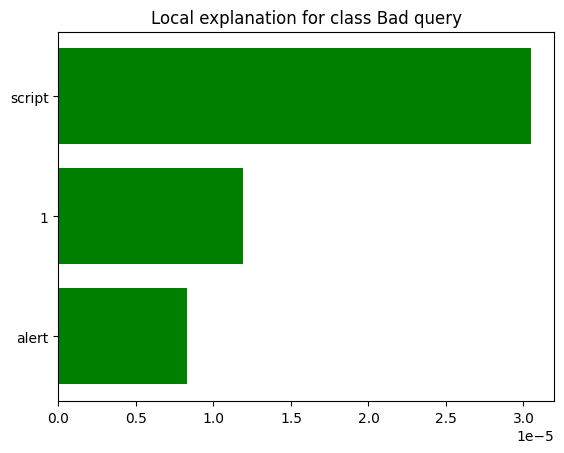

In [8]:
# We then generate an explanation
query = '<script>alert(1)</script>'
# query = '<script>alert(1)/*javascript/nets.png/javascript/nets.png/javascript/nets.png/javascript/nets.png/javascript/nets.png*/</script>'
# query = '/<script>alert(1)/*index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/index.html/*/</script>/'
exp = explainer.explain_instance(query, prediction_pipeline.predict_proba, num_features=6)
print('Probability =', prediction_pipeline.predict_proba([query])[0,1])


# The explanation is presented below as a list of weighted features. 
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")
# we can save the fully contained html page to a file:
output_path = './explanation/waf_explanation.html'
exp.save_to_file(output_path)
print(f"\nLIME explanation saved as HTML file at: {output_path}")

# Visualize the explanation
exp.as_pyplot_figure().show()

### More results at explanation/waf_explanation.html